In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# dteday sütununun veriden çıkartılması
# çünkü normalizasyonda problem çıkartır, sadece sıralamayı ifade eder ve aynı şeyi indisler de ifade edebilir.
df = df.drop('dteday', axis=1)

In [6]:
# veriyi 0 ile 1 arasına normalize ediyoruz
for key in df.keys():
    df[key] = df[key]/(df[key].max()-df[key].min())

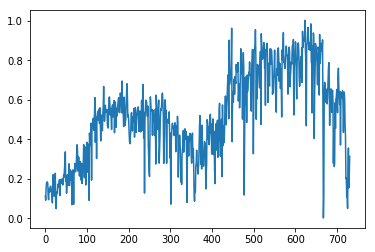

In [7]:
# genel olarak cnt şu şekilde değişmiş
plt.plot(df.cnt)

In [8]:
# hareketli ortalama fonksiyonu
def sma(array, record_count):
    arr = array
    n = record_count
    newarr = []
    for i in range(n, len(arr)):
        newarr.append(np.average(arr[i-n:i]))
    
    return newarr

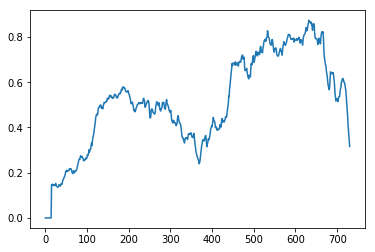

In [9]:
# kiralama sayısının 15 günlük hareketli ortalaması
df['cnt_sma'] = [0]*15 + sma(df.cnt, 15)
plt.plot(df.cnt_sma)

In [10]:
# sütunlar arasındaki korelasyonu buluyoruz
korelasyon = df.corr()

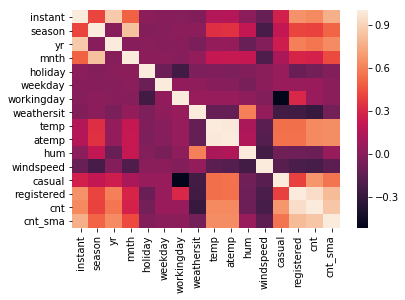

In [11]:
# korelasyon haritasını daha iyi görebilmemiz için görselleştiriyoruz
#ve bisiklet kiralama sayısı ile hangi sütunların daha çok ilgili olduğunu görüyoruz
sns.heatmap(korelasyon)

instant


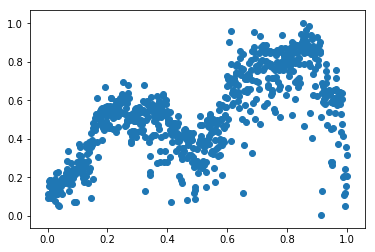

season


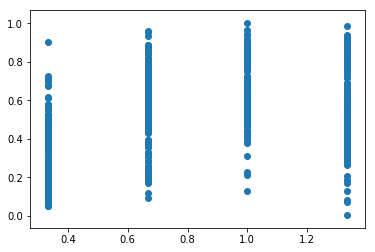

yr


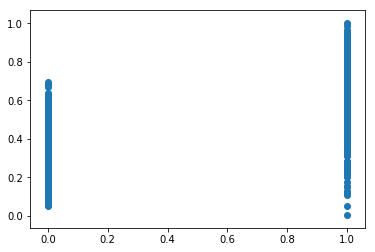

mnth


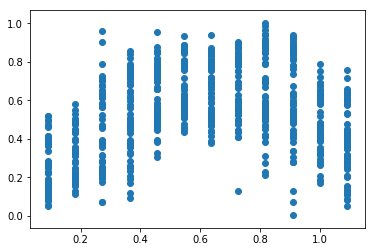

holiday


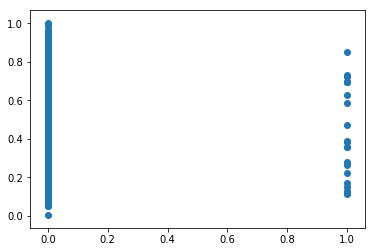

weekday


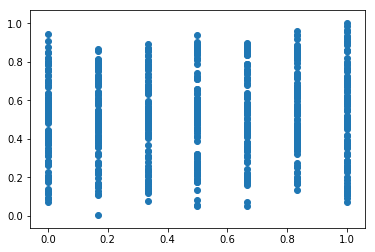

workingday


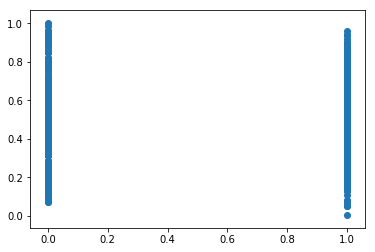

weathersit


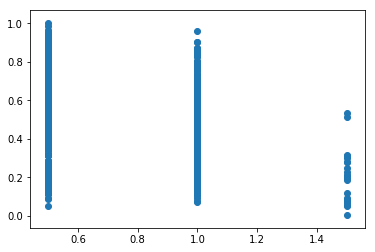

temp


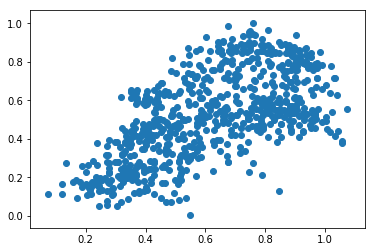

atemp


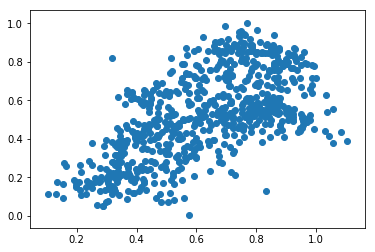

hum


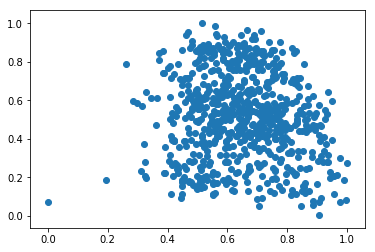

windspeed


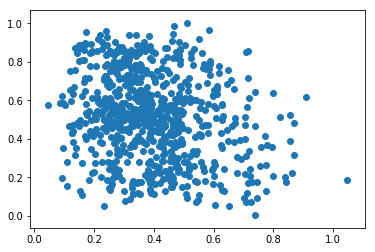

casual


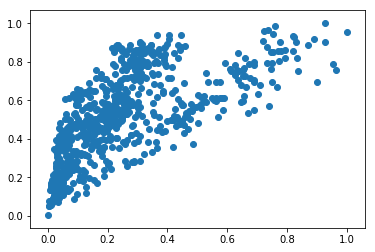

registered


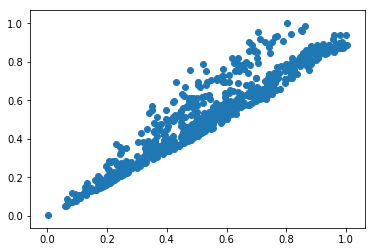

cnt


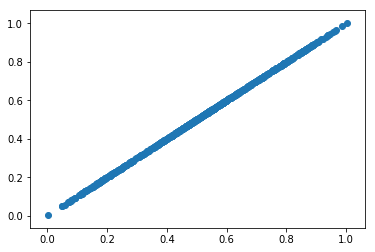

cnt_sma


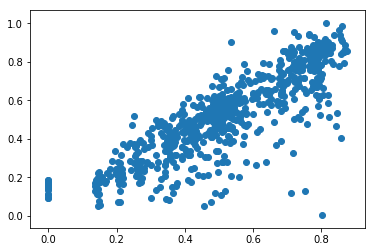

In [13]:
for i in df.keys():
    print(i)
    plt.scatter(df[i], df['cnt'])
    plt.show()